In [4]:
from stage2 import *

from cosmolopy.distance import luminosity_distance, angular_diameter_distance, proper_motion_distance, light_travel_distance
from cosmolopy.distance import comoving_distance, hubble_distance_z, hubble_z, comoving_volume, lookback_time, age, redshift_d_light

## Setting redshift and cosmology

In [3]:
cosmo = {'omega_M_0' : 0.3, 'omega_lambda_0' : 0.7, 'omega_k_0' : 0.0, 'h' : 0.72}

## Computing distance

In [11]:
zRange = np.arange(0, 11, 0.01)

#compute distances in Gpc
DL = luminosity_distance(zRange, **cosmo)/1000
DA = angular_diameter_distance(zRange, **cosmo)/1000
Dc = comoving_distance(zRange, **cosmo)/1000

$\theta = d / d_A$

Si $d_A$ diminue à grand redshift, à taille constante, les galaxies lointaines doivent nous apparaître plus grandes

# Cosmological distances as a function of redshift

Text(0.5, 0, '$\\rm{lookback \\,\\, time \\, (Gyr)}$')

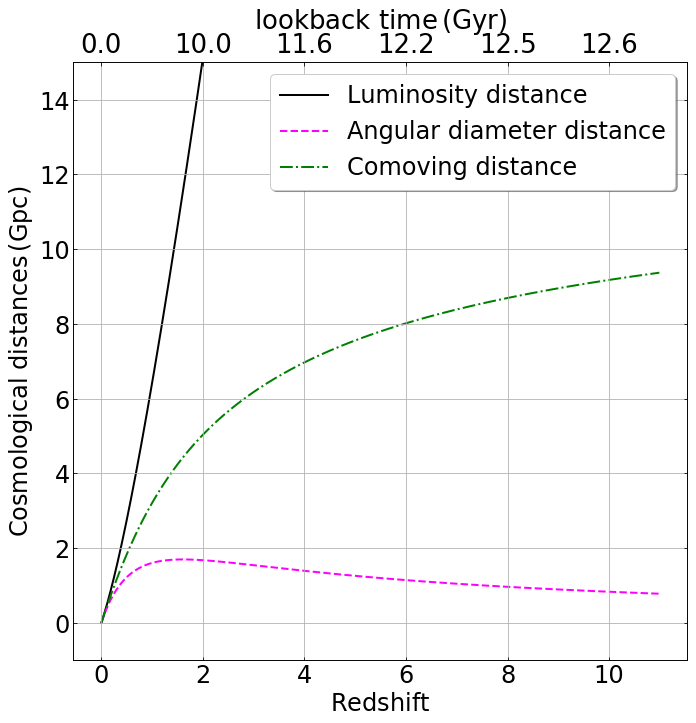

In [41]:
plt.rcParams["figure.figsize"] = (11, 11) # (w, h)
f = plt.figure()
plt.subplots_adjust(wspace=0.25, hspace=0.05)

ax, ret = asManyPlots(111, [zRange]*3, [DL, DA, Dc],
                      xlabel=r"$\rm{Redshift}$",
                      ylabel=r"$\rm{Cosmological \,\, distances \, (Gpc)}$",
                      ylim=[-1, 15],
                      plotFlag=[True, True, True],
                      color=['black', 'magenta', 'green'],
                      linestyle=['-', '--', '-.'],
                      linewidth=2,
                      marker='None',
                      showLegend=True,
                      legendMarkerColor=['k', 'magenta', 'green'],
                      label=['Luminosity distance', 'Angular diameter distance', 'Comoving distance'])

ax2  = ax.twiny()
ax2.tick_params(axis='x', direction='in', labelsize=26)
tcks = np.arange(0, 12, 2)
ax2.set_xticks(tcks)
ax2.set_xlim([i for i in list(ax.get_xlim())])
ax2.set_xticklabels([np.round(i, 1) for i in lookback_time(tcks, **cosmo)/3600/24/365/1e9])
ax2.set_xlabel(r'$\rm{lookback \,\, time \, (Gyr)}$', size=26)

# Evolution of angular size as a function of redshift

In [85]:
zRange = np.arange(0.01, 100, 0.01)

#compute distances in Gpc
DA = angular_diameter_distance(zRange, **cosmo)/1000

(0.6, 2.4)

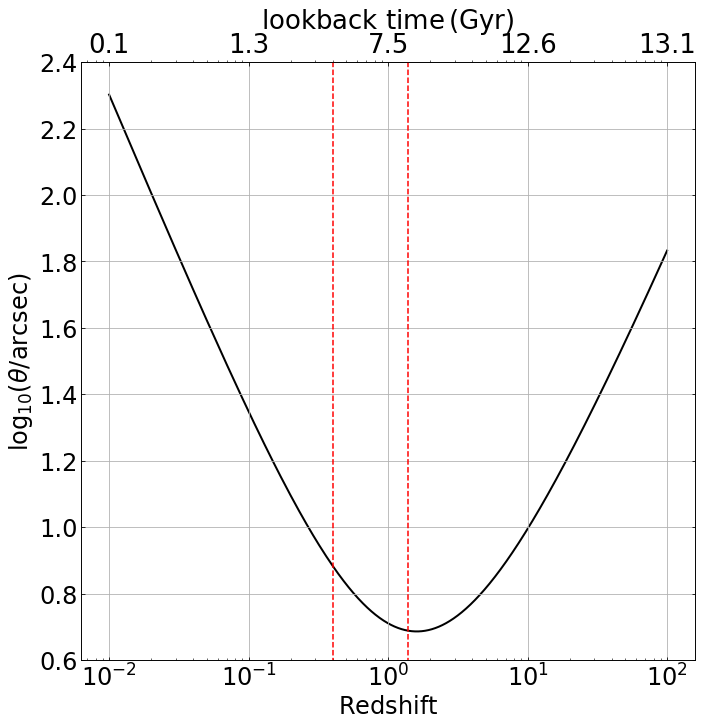

In [90]:
from numpy import pi
plt.rcParams["figure.figsize"] = (11, 11) # (w, h)
f = plt.figure()
plt.subplots_adjust(wspace=0.25, hspace=0.05)

phys_size = 40 #kpc
angle     = phys_size*1e3/(DA*1e9) #rad
angle    *= 180/pi*3600

ax, ret = asManyPlots(111, zRange, np.log10(angle),
                      xlabel=r"$\rm{Redshift}$",
                      ylabel=r"$\log_{10} ( \theta / \rm{arcsec})$",
                      plotFlag=[True],
                      color=['black'],
                      linestyle=['-'],
                      linewidth=2,
                      marker='None')
plt.xscale('log')
tcks = plt.xticks()[0]


ax2  = ax.twiny()
plt.xscale('log')
ax2.tick_params(axis='x', direction='in', labelsize=26)
ax2.set_xticks(tcks)
ax2.set_xlim([i for i in list(ax.get_xlim())])
ax2.set_xticklabels([np.round(i, 1) for i in lookback_time(tcks, **cosmo)/3600/24/365/1e9])
ax2.set_xlabel(r'$\rm{lookback \,\, time \, (Gyr)}$', size=26)

plt.plot([0.4, 0.4], [0, 3], linestyle="--", color='red')
plt.plot([1.4, 1.4], [0, 3], linestyle="--", color='red')
plt.ylim([0.6, 2.4])